# Spot check classification algorithms
Content from Jason Brownlee's book [Machine learning mastery with Python](https://machinelearningmastery.com/machine-learning-with-python/)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare data
Load data from URL to dataframe and generate X and y from array:

In [12]:
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df = pd.read_csv(url, names=names)
array = df.values
X = array[:,0:8]
y = array[:,8]

## Prepare cross validation

In [25]:
from sklearn import cross_validation
kfold = cross_validation.KFold(n=len(X), n_folds=10, random_state=42)

## Spot-check linear models

### Logistic regression
Binary classification model. Can do multi-class (one vs rest). Assumes Gaussian distribution.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.76951469583048526

### Linear discriminant analysis
For binary and multiclass classification. Assumes Gaussian distribution.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.77346206425153796

## Spot-check non-linear models

### K-Nearest Neighbors
Uses distance metric to find the K most similar instances in training data and takes the mean outcome of the neighbors as the prediction.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.72655502392344506

### Naive Bayes
Calculates probability for each class, and conditional probability given input value. Assumes independent variables (a simple or "naive" assumption). Assumes Gaussian distribution.

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.75517771701982228

### Decision trees
aka Classification and Regression Trees (CART). Chooses split points greedily to minimize cost function (like [Gini](https://en.wikipedia.org/wiki/Gini_coefficient) index). 

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.69389952153110046

### Support Vector Machines
Looks for line that separates two classes (data instances closest to lines are called "support vectors"). Binary or multiclass. Kernel parameter sets kernel function (default = radial basis function).

In [36]:
from sklearn.svm import SVC
model = SVC()
results = cross_validation.cross_val_score(model, X, y, cv=kfold)
results.mean()

0.65102529049897473

## Compare algorithms consistently

In [38]:
# imports already done
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [40]:
# process in loop
results = []
names = []

for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{}: {} ({})'.format(name, cv_results.mean(), cv_results.std()))

LR: 0.7695146958304853 (0.04841051924567195)
LDA: 0.773462064251538 (0.05159180390446138)
KNN: 0.7265550239234451 (0.06182131406705549)
CART: 0.705639097744361 (0.0689393908802863)
NB: 0.7551777170198223 (0.04276593954064409)
SVM: 0.6510252904989747 (0.07214083485055327)


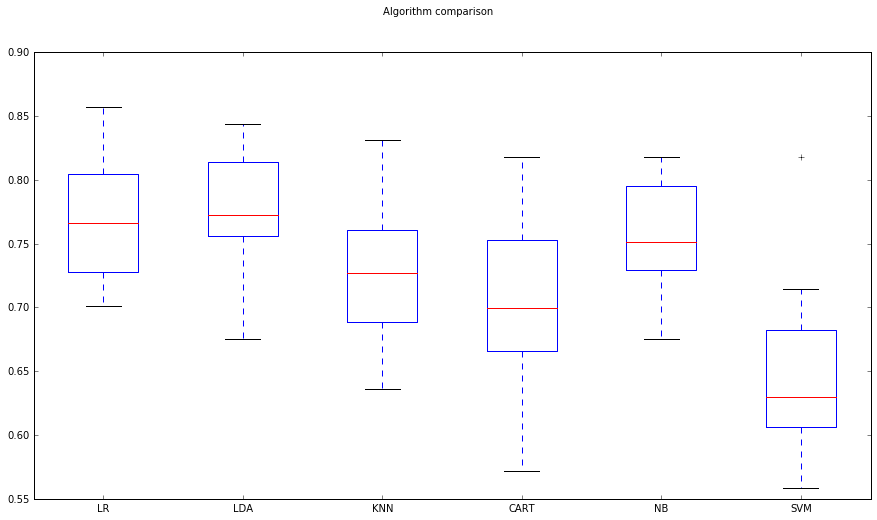

In [46]:
# plot comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()